In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# โหลดข้อมูล MNIST
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
# เตรียมข้อมูลให้อยู่ในรูปแบบที่โมเดลต้องการ
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# ปรับขนาดเป็น 32x32 และเพิ่มช่องสี 3 ช่อง
train_images = tf.image.resize(train_images, (32, 32))
test_images = tf.image.resize(test_images, (32, 32))

# เปลี่ยนเป็นช่องสี RGB
train_images = tf.repeat(train_images, 3, axis=-1)
test_images = tf.repeat(test_images, 3, axis=-1)

train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
# ใช้ ImageDataGenerator สำหรับ Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
# สร้างโมเดลโดยใช้ Transfer Learning
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze layer ของ ResNet50
base_model.trainable = False

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# สร้างโมเดลของเรา
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 class (0-9)
])


In [ ]:
# คอมไพล์โมเดล
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# ใช้ EarlyStopping เพื่อหยุดการฝึกเมื่อไม่มีการปรับปรุง
early_stop = EarlyStopping(monitor='val_loss', patience=3)

# เทรนโมเดล
history = model.fit(train_images, train_labels, epochs=30,
                    validation_data=(test_images, test_labels),
                    callbacks=[early_stop])

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 301s 161ms/step - accuracy: 0.7998 - loss: 0.6852 - val_accuracy: 0.8980 - val_loss: 0.3393
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 296s 158ms/step - accuracy: 0.8876 - loss: 0.3593 - val_accuracy: 0.9200 - val_loss: 0.2587
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 325s 160ms/step - accuracy: 0.9030 - loss: 0.3068 - val_accuracy: 0.9130 - val_loss: 0.2784
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 320s 159ms/step - accuracy: 0.9140 - loss: 0.2696 - val_accuracy: 0.9283 - val_loss: 0.2230
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 323s 159ms/step - accuracy: 0.9199 - loss: 0.2494 - val_accuracy: 0.9351 - val_loss: 0.2081
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 320s 158ms/step - accuracy: 0.9246 - loss: 0.2396 - val_accuracy: 0.9197 - val_loss: 0.2501
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 321s 157ms/step - accuracy: 0.9272 - loss: 0.2282 - val_accuracy: 0.9345 - val_loss: 0.2057
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 321s 157ms/step - ac

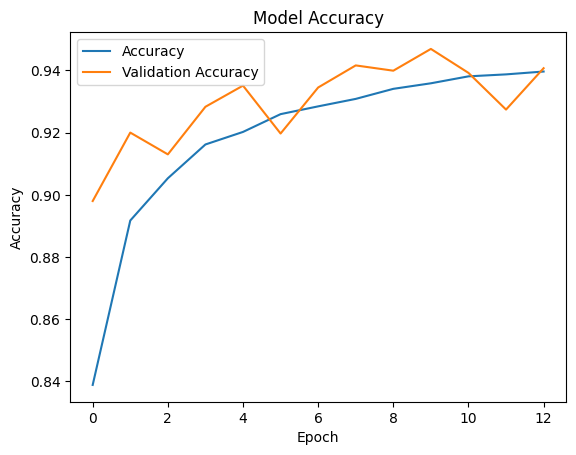

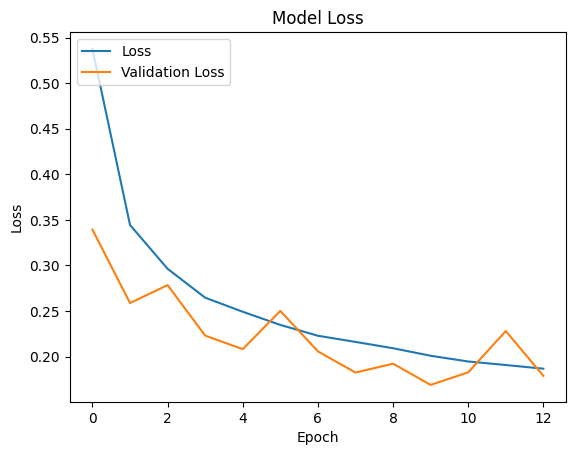

In [ ]:
import matplotlib.pyplot as plt
# Step 6: แสดงผลการฝึก
# แสดงกราฟการเรียนรู้
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

# แสดงกราฟค่าความสูญเสีย
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.show()

In [ ]:
# Step 7: ประเมินผลโมเดล
val_loss, val_acc = model.evaluate(test_images, test_labels)
print(f'Validation accuracy: {val_acc * 100:.2f}%')
print(f'Validation loss: {val_loss:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 49s 156ms/step - accuracy: 0.9305 - loss: 0.2067
Validation accuracy: 94.07%
Validation loss: 0.1788


In [ ]:
model.save('Predict_Num3.keras')

In [ ]:
from google.colab import files

In [ ]:
files.download('Predict_Num3.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>